In [1]:
import fns
from fns import *
from fns.functionsTFhardbound import *
%matplotlib inline

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
# from bokeh.io import output_notebook
# from bokeh.plotting import figure, show, output_file
# output_notebook()
from IPython.display import clear_output, Image, display

********************************************************************************
functionsTFhardbound loaded!
********************************************************************************


In [2]:
PAPER = os.path.expanduser('~/Dropbox/ICL-2014/Presentations/2016-10-11-GJ-sync-paper/figures/')

In [3]:
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
# matplotlib.rc("font", family="Times")

## Colors

In [4]:
N1 = '#65CBFF'
N2 = '#9595C9'
NS = '#66CC99'

resonance 45
resonance 15


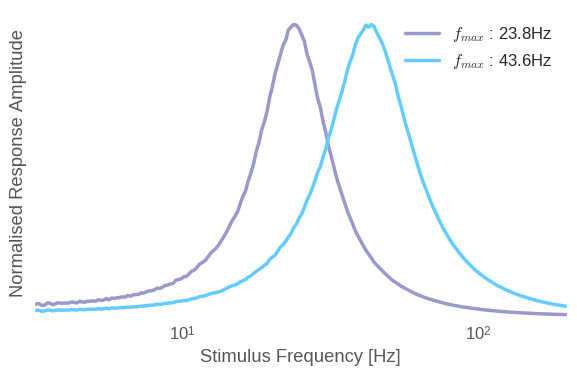

In [8]:
# --------------------------------------------------------------------------------
# plot subthreshold resonance
# --------------------------------------------------------------------------------
fig = plt.figure(figsize=(6,4))
tauv=45
ax01 = fig.add_subplot(111)
F = np.logspace(0.5, 2.3, 200)
mod = resonanceFS(tauv=tauv)
mod15 = resonanceFS(tauv=15)
ax01.semilogx(F, mod / np.nanmax(mod), label='$f_{max}$ : %.1fHz' % (F[np.argmax(mod)]), color='#9999cc')
ax01.semilogx(F, mod15 / np.nanmax(mod15), label='$f_{max}$ : %.1fHz' % (F[np.argmax(mod15)]), color='#66ccff')
ax01.set_ylim([0, 1.05])
ax01.set_xlabel('Stimulus Frequency [Hz]')
ax01.set_ylabel('Normalised Response Amplitude')
ax01.set_xlim([0, 200])
# ax01.set_title('Subthreshold Resonant Property', y=1.08)
ax01.set_yticks([])
ax01.legend()
plt.tight_layout()
plt.savefig(PAPER + 'fig3-2resonances.eps')

In [ ]:
def readMatrix(path=''):
    # simulation parameters
    with open(path) as file:
        array2d = [[float(digit) for digit in line.split()] for line in file]
    return array2d

In [ ]:
# --------------------------------------------------------------------------------
# PLot weights
# --------------------------------------------------------------------------------
# Instantiate classes

data_path = '/mnt/DATA/gp1514/Projects/github/cortex/data/olddata/'


GAP2D0 = readMatrix(data_path + 'GAP0_g-10_TImean-30_T-30020_Glob-0_dt-0.25_N-400_r-0_S-100_WII-1400_LTD-0.00188_LTP-0.0282_model-gp-izh-subnetworks_sG-28_sWII-10_tauv-59_0.txt')
GAP2D = readMatrix(data_path + 'GAP_g-10_TImean-30_T-30020_Glob-0_dt-0.25_N-400_r-0_S-100_WII-1400_LTD-0.00188_LTP-0.0282_model-gp-izh-subnetworks_sG-28_sWII-10_tauv-59_0.txt')

fig = plt.figure(figsize=(6,4))
ax1 = plt.subplot(111)
im1 = ax1.imshow(np.array(GAP2D0), interpolation='nearest')
ax1.set_title(r'$\gamma(t = 0s)$')
fig.colorbar(im1)
plt.savefig(PAPER + 'weights_0.svg')

fig = plt.figure(figsize=(6,4))
ax2 = plt.subplot(111)
im2 = ax2.imshow(np.array(GAP2D), interpolation='nearest')
ax2.set_title(r'$\gamma(t = 30s)$')
fig.colorbar(im2)
plt.tight_layout()
plt.savefig(PAPER + 'weights_end.svg')

In [13]:
tauv, sG, N, T, nu = 15, 100, 2000, 20000, 150
ratio = 0.2
rasterPath = "../data/rasters/rasterPlast-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f_dt-0.1" % (tauv, 
                                                                                 sG, N, T, nu, ratio)
r = np.load(rasterPath)
varPath = "../data/rasters/rastervarPlast-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f_dt-0.1" % (tauv, 
                                                                                 sG, N, T, nu, ratio)
var = np.load(varPath)

['g1', 'vvmN2', 'g1s', 'i1N1', 'g1N2', 'vvm', 'vvmN1', 'g1N1', 'i1N2']


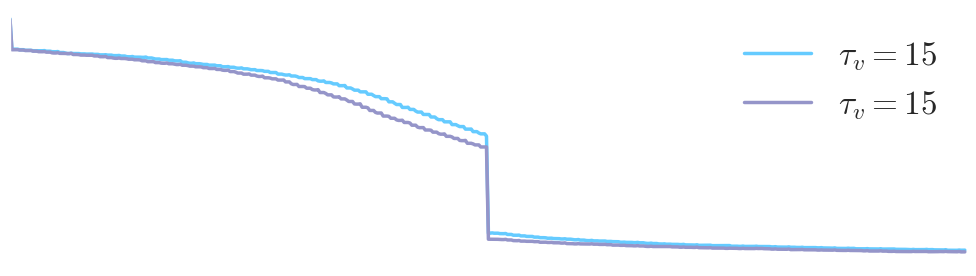

In [14]:
print(var.keys())
plt.figure(figsize=(10,3))
plt.plot(var['g1N1'], color=N1, label=r'$\tau_v = 15$')
plt.plot(var['g1N2'], color=N2, label=r'$\tau_v = %d$'%tauv)
# plt.ylabel(r'$\gamma$')
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=24)
plt.tight_layout()
plt.savefig(PAPER + "gamma-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f.pdf" % (tauv, sG, N, T, nu, ratio))

[15.996800639872026, 17.450035283397828]

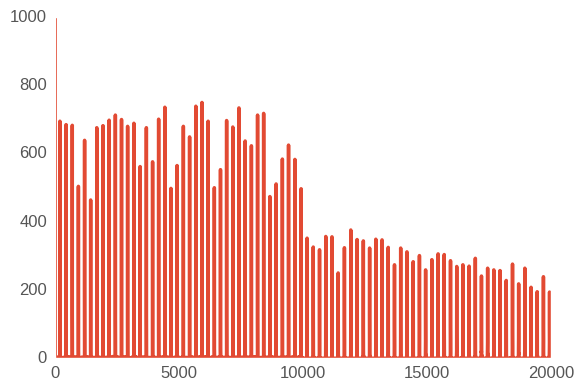

In [12]:
plt.plot(var['vvmN2'])
fourier(var['vvmN2'])

OK
ratio = 0.5
nu = 150 
tauv 15, 30 

NOT OK
ratio = 0.5, 0.2
nu = 50 
tauv 15 

ratio = 0.5
nu = 100


In [342]:
# plt.figure(figsize=(10,10))
# plt.imshow(r[500:1500, 0:15000], aspect=10)

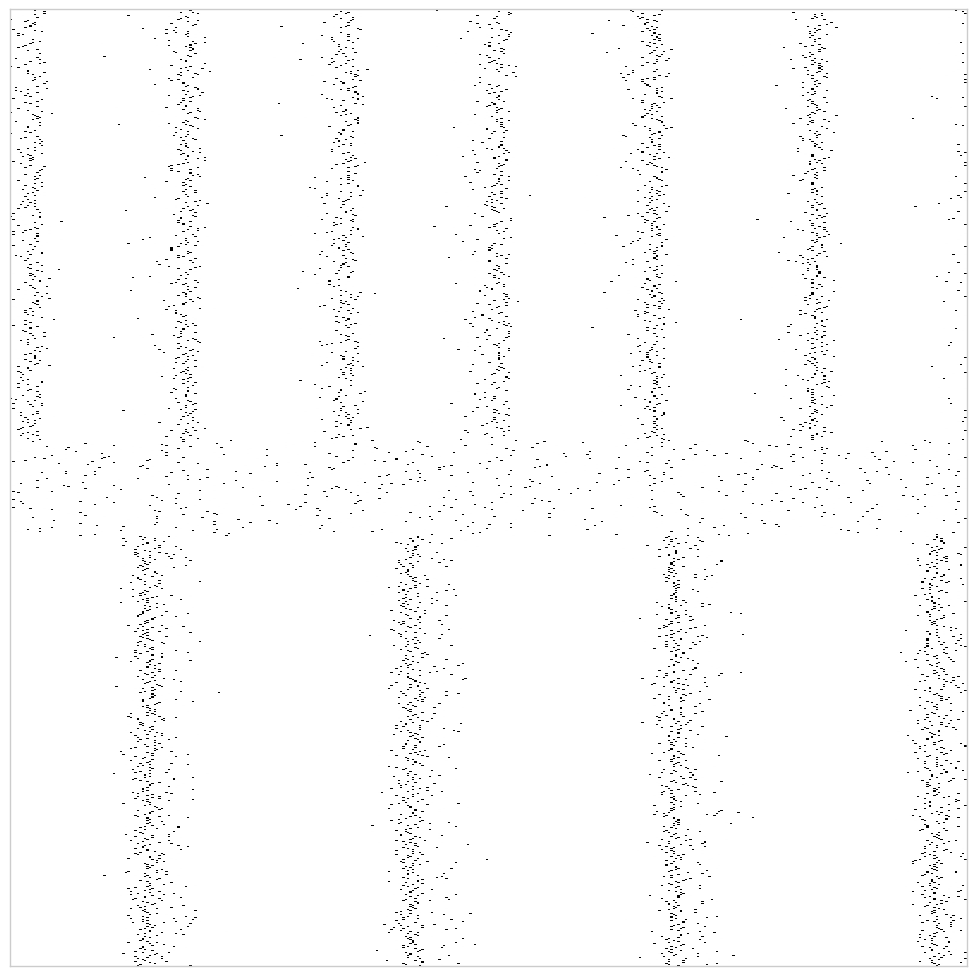

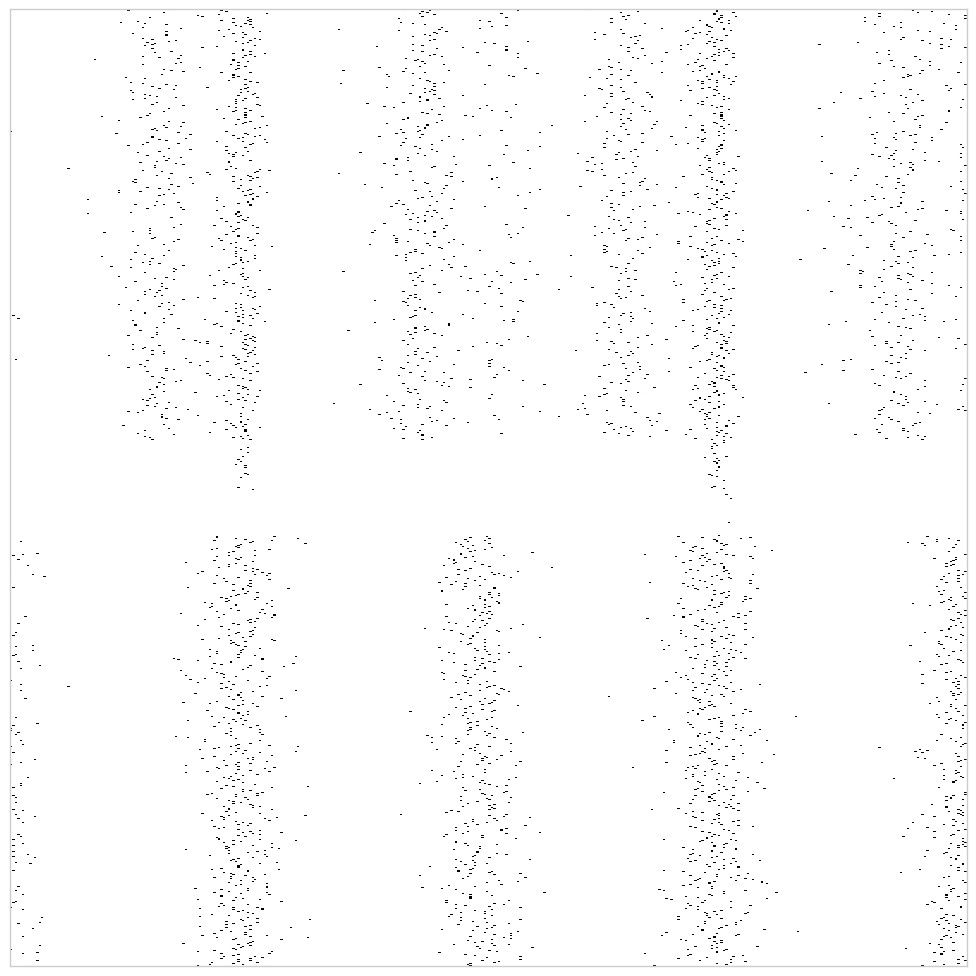

In [343]:
plt.figure(figsize=(10,10))
plt.imshow(r[0:2000, 9000:9400], aspect=0.2, interpolation='none')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(PAPER + "rasterstart-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f.png" % (tauv, sG, N, T, nu, ratio))

plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(r[0:2000, 19000:19400], aspect=0.2, interpolation='none')
plt.tight_layout()
plt.savefig(PAPER + "rasterend-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f.png" % (tauv, sG, N, T, nu, ratio))

[85.92088472990217, 10.742768638259722]
[88.472990216928963, 11.261335354324448]
[71.713147410358559, 11.556089925159538]
[63.745019920318725, 12.148560048790715]
[6.2194580186583739, -15.674697729719366]
[7.9964460239893382, -16.748813687940686]
csd :  0.0721107553727
csd :  0.0249087662833
[69.930069930069934, -7.2174399536862506]
[71.92807192807193, -6.9242411784517666]


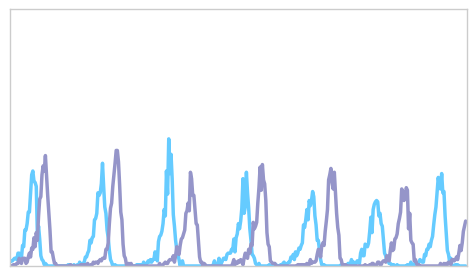

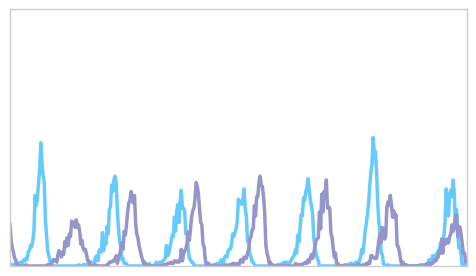

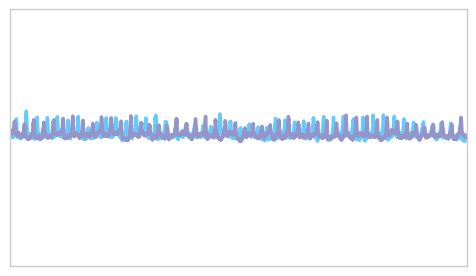

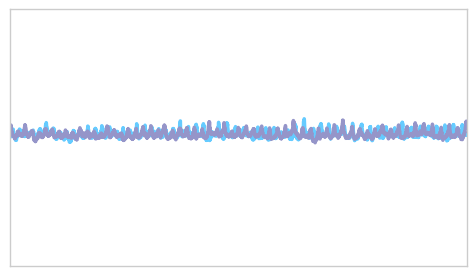

In [379]:
s = 9000
e = s + 400
plt.figure(figsize=(5,3))
plt.plot(var['vvmN1'][s:e], color = N1)
plt.plot(var['vvmN2'][s:e], color = N2)
plt.xticks([])
plt.yticks([])
plt.ylim([0,200])
plt.tight_layout()
plt.savefig(PAPER + "vstart-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f.pdf" % (tauv, sG, N, T, nu, ratio))
print(fourier(var['vvmN1'][s:s+e]))
print(fourier(var['vvmN2'][s:s+e]))


s = 19000
e = s + 400
plt.figure(figsize=(5,3))
plt.plot(var['vvmN1'][s:e], color = N1)
plt.plot(var['vvmN2'][s:e], color = N2)
plt.xticks([])
plt.yticks([])
plt.ylim([0,200])
plt.tight_layout()
print(fourier(var['vvmN1'][s:s+e]))
print(fourier(var['vvmN2'][s:s+e]))
plt.savefig(PAPER + "vend-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f.pdf" % (tauv, sG, N, T, nu, ratio))

s = 6000
e = s + 3000
i1 = var['i1N1']
i2 = var['i1N2']
plt.figure(figsize=(5,3))
plt.plot(i1[s:e], color = N1)
plt.plot(i2[s:e], color = N2)
plt.xticks([])
plt.yticks([])
plt.ylim([0,100])
plt.tight_layout()
plt.savefig(PAPER + "istart-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f.pdf" % (tauv, sG, N, T, nu, ratio))
print(fourier(i1[s:s+e]))
print(fourier(i2[s:s+e]))
csd = np.abs(signal.csd(i1[s:e], i2[s:e], fs=1 / 0.00025, nperseg=512))
print("csd : ", np.max(csd[1,:]))



s = 16000
e = s + 3000
i1 = var['i1N1']
i2 = var['i1N2']
plt.plot()
csd = np.abs(signal.csd(i1[s:e], i2[s:e], fs=1 / 0.00025, nperseg=512))
print("csd : ", np.max(csd[1,:]))

plt.figure(figsize=(5,3))
plt.plot(i1[s:e], color = N1)
plt.plot(i2[s:e], color = N2)
plt.xticks([])
plt.yticks([])
plt.ylim([0,100])
plt.tight_layout()
print(fourier(i1[s:s+e]))
print(fourier(i2[s:s+e]))
plt.savefig(PAPER + "iend-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f.pdf" % (tauv, sG, N, T, nu, ratio))


/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 140)

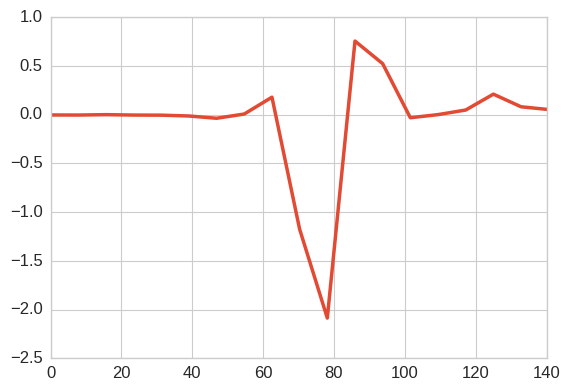

In [380]:
s = 16000
e = s + 3000
# csd = np.abs(signal.csd(i1[s:e], i2[s:e], fs=1 / 0.00025, nperseg=512))
# plt.plot(csd[0,:], csd[1,:])
f, Pxy = signal.csd(var['vvmN1'][s:e], var['vvmN2'][s:e], fs=1 / 0.00025, nperseg=512)
plt.plot(f,Pxy)
plt.xlim([0,140])

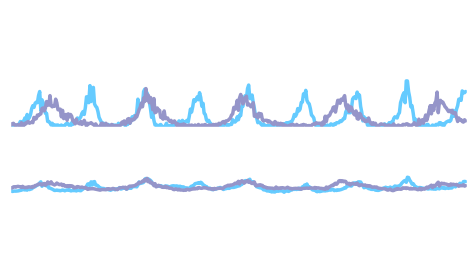

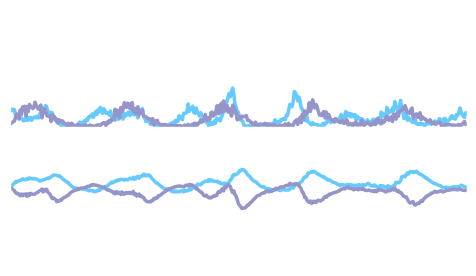

In [291]:
s = 9000
e = s + 400
fig = plt.figure(figsize=(5,3))
ax1 = fig.add_subplot(211)
ax1.plot(var['vvmN1'][s:e], color = N1)
ax1.plot(var['vvmN2'][s:e], color = N2)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylim([0,200])


ax1 = fig.add_subplot(212)
ax1.plot(var['i1N1'][s:e], color = N1)
ax1.plot(var['i1N2'][s:e], color = N2)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylim([30,100])
plt.tight_layout()
plt.savefig(PAPER + "ivstart-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f.pdf" % (tauv, sG, N, T, nu, ratio))


s = 19000
e = s + 400
fig = plt.figure(figsize=(5,3))
ax1 = fig.add_subplot(211)
ax1.plot(var['vvmN1'][s:e], color = N1)
ax1.plot(var['vvmN2'][s:e], color = N2)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylim([0,200])


ax1 = fig.add_subplot(212)
ax1.plot(var['i1N1'][s:e], color = N1)
ax1.plot(var['i1N2'][s:e], color = N2)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylim([30,100])
plt.tight_layout()
plt.savefig(PAPER + "ivend-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f.pdf" % (tauv, sG, N, T, nu, ratio))


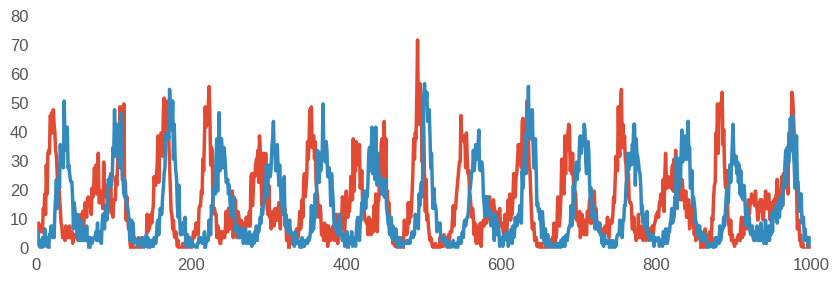

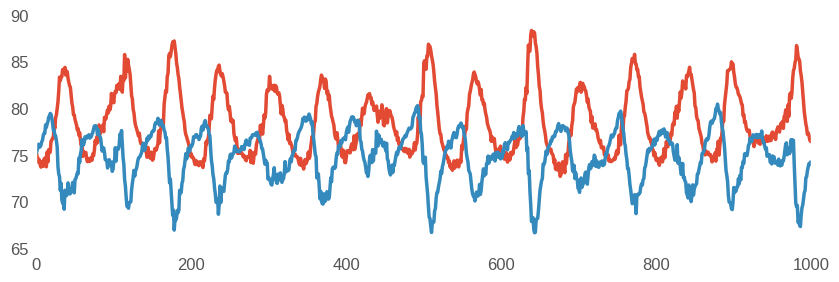

In [151]:
s = 18000
e = s + 1000

fourier(var['vvmN1'][s:s+e])
plt.figure(figsize=(10,3))
plt.plot(var['vvmN1'][s:e])
plt.plot(var['vvmN2'][s:e])

plt.figure(figsize=(10,3))
plt.plot(var['i1N1'][s:e])
plt.plot(var['i1N2'][s:e])


In [ ]:
# TOOLS="hover,crosshair,pan,wheel_zoom,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# p = figure(tools=TOOLS)

# start = 14900
# end = 15000
# s = find(x,start)
# e = find(x,end)
# xb = x[s:e]
# yb = y[s:e]
# p.scatter(x, y, radius=1,
#          fill_alpha=0.6,
#           line_color=None)

# output_file("color_scatter.html", title="color_scatter.py example")

# show(p)

## RASTERS

In [ ]:
def getSpikes(tauv, sg):
    data_path = '/mnt/DATA/gp1514/Projects/github/cortex/data/olddata/'
    path_x = (data_path + 'spike_x_g-10_TImean-30_T-30020_Glob-0_dt-0.25_N-400_r-0_S-100_WII-1400_LTD-0.00188_LTP-0.0282_model-gp-izh-subnetworks_sG-%d_sWII-10_tauv-%d_0.txt'%(sg,tauv))
    path_y = (data_path + 'spike_y_g-10_TImean-30_T-30020_Glob-0_dt-0.25_N-400_r-0_S-100_WII-1400_LTD-0.00188_LTP-0.0282_model-gp-izh-subnetworks_sG-%d_sWII-10_tauv-%d_0.txt'%(sg,tauv))
    spikes_x = np.fromfile(path_x, dtype='uint', count=-1, sep=" ")
    spikes_y = np.fromfile(path_y, dtype='uint', count=-1, sep=" ")
    return spikes_x, spikes_y


In [ ]:
def plotRaster(spikes_x, spikes_y, ax=None, titlestr=""):
    if not ax:
        f = plt.figure(figsize=(4, 3))
        ax = f.add_subplot(111)
    # ax.set_xticks([])
    # ax.set_yticks([0,300])
    # ax.set_xlabel('Time [1.5s]')
    # ax.set_ylabel('Neuron indices [0-300]')
    # ax.set_title('Neuronal Activity')
    if ax == None:
        plt.plot(spikes_x, spikes_y, '.', markersize=1, color='grey')
        plt.title(titlestr, y=1.08)
    else:
        ax.plot(spikes_x, spikes_y, '.', markersize=1, color='grey')
        ax.set_title(titlestr, y=1.08)
    return ax
    # plt.savefig(DIRECTORY + extension + '_raster.pdf')
    # plt.savefig(DIRECTORY + extension + '_raster.png')

In [ ]:
N=1000
#--------------------------------------------------------------------------------
# RASTER PLOT begin and end of simulation
#--------------------------------------------------------------------------------
fig= plt.figure(figsize=(6,4.5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plotRaster(spikes_x[0:50*N], spikes_y[0:50*N], ax=ax1)
plotRaster(spikes_x[-50*N:], spikes_y[-50*N:], ax=ax2)

In [ ]:
lim = 15000
sp =np.zeros([400, np.max(spikes_x[:lim])+1])
sp[spikes_y[:lim], spikes_x[:lim]]=1
plt.imshow(sp)

In [ ]:
N = 400
plt.plot(np.mean(sp[:N//2,:], axis=0))
plt.plot(np.mean(sp[N//2:,:], axis=0))

In [ ]:
def find(arr,v):
    idx = (np.abs(arr - v)).argmin()
    return idx

In [ ]:
def plotRaster(spikes_x, spikes_y, xmin, xmax):
    plt.figure()
    vmin = find(spikes_x, xmin)
    vmax = find(spikes_x, xmax)
    
    spx = spikes_x[vmin:vmax]
    spy = spikes_y[vmin:vmax]
    
    sp =np.zeros([400, xmax])
    sp[spy, spx]=1
    plt.imshow(sp)
    plt.xlim([xmin,xmax])
    plt.yticks([])

In [ ]:
spikes_x, spikes_y = getSpikes(45,0)

plotRaster(spikes_x, spikes_y, 1000, 2000)
plotRaster(spikes_x, spikes_y, 29000, 30000)

## TEST & DEBUG

In [4]:
g = 10
N = 200
T = 20
nu = 100
sG = 0
tauv = 45
gpu = TfConnEvolveNet(N=N,
                  T=T,
                  disp=False,
                  tauv=tauv,
                  device='/gpu:0',
                  spikeMonitor=False,
                  g0=g,
                  startPlast = 500,
                  nu = nu,
                  NUM_CORES = 1,
                  both=True,
                 sG = sG,
                      )
# gpu.input = apple
gpu.debug = False
gpu.connectTime=5000
gpu.FACT = 300
gpu.dt = 0.1
gpu.ratio = 0.5
gpu.runTFSimul()

# filename = "rastervarPlast-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f" % (tauv, sG, N, T, nu, gpu.ratio)
# with open(filename, 'wb') as f:
#     four = fourier(gpu.vvm[100:])
#     np.savez(f,
#              vvm=gpu.vvm,
#              im=gpu.im,
#              freq=four[0],
#              power=four[1],
#              gamma=gpu.gamma,
#              )

# filename = "rasterPlast-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f" % (tauv, sG, N, T, nu, gpu.ratio)
# with open(filename, 'wb') as f:
#     r = np.array(gpu.raster)
#     r = r.reshape(r.shape[0], r.shape[1]).transpose()
#     np.save(f, r)


0.40



/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [5]:
gpu.vvm


[78.0,
 22.0,
 100.0,
 0.0,
 0.0,
 0.0,
 0.0,
 29.0,
 40.0,
 16.0,
 7.0,
 3.0,
 3.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [23]:
sim_index = tf.placeholder(tf.int32, shape=(), name='dt')
a[0].eval(feed_dict={sim_index:1})

InvalidArgumentError: You must feed a value for placeholder tensor 'sim_index' with dtype int32
	 [[Node: sim_index = Placeholder[dtype=DT_INT32, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'sim_index', defined at:
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2827, in run_ast_nodes
    if self.run_code(code, result):
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-1dee7449c0f9>", line 26, in <module>
    gpu.runTFSimul()
  File "/mnt/DATA/gp1514/Projects/github/cortex/notebooks/fns/functionsTFhardbound.py", line 1064, in runTFSimul
    sim_index = tf.placeholder(tf.int32, shape=(), name='sim_index')
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1447, in placeholder
    name=name)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2037, in _placeholder
    name=name)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 750, in apply_op
    op_def=op_def)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2241, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1133, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'sim_index' with dtype int32
	 [[Node: sim_index = Placeholder[dtype=DT_INT32, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


In [7]:
with tf.device(gpu.device):
    sim_index = tf.placeholder(tf.int32, shape=(), name='dt')
    a.eval(feed_dict={sim_index:1})

InvalidArgumentError: You must feed a value for placeholder tensor 'sim_index' with dtype int32
	 [[Node: sim_index = Placeholder[dtype=DT_INT32, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'sim_index', defined at:
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2827, in run_ast_nodes
    if self.run_code(code, result):
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-1dee7449c0f9>", line 26, in <module>
    gpu.runTFSimul()
  File "/mnt/DATA/gp1514/Projects/github/cortex/notebooks/fns/functionsTFhardbound.py", line 1064, in runTFSimul
    sim_index = tf.placeholder(tf.int32, shape=(), name='sim_index')
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1447, in placeholder
    name=name)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2037, in _placeholder
    name=name)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 750, in apply_op
    op_def=op_def)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2241, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1133, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'sim_index' with dtype int32
	 [[Node: sim_index = Placeholder[dtype=DT_INT32, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


In [1]:
# a = gpu.init_float([20,1], "name")
a = np.empty([20,1])
a[3] = 4
out = []
a = tf.constant(a)
for i in range(20):
    out.append(a)
output = tf.pack(out)
output.eval()

NameError: name 'np' is not defined

In [ ]:
t0=13000
t1=20000

### DEBUG UNSTABILITY
### note: when connecting subnetworks, jump in I from additional 
### spikelets creates unstability
# plt.figure(figsize=(7,3))
# plt.plot(gpu.vvmN2[t0:t1]/np.max(gpu.vvmN2))
# plt.plot(gpu.wcontrol[t0:t1]/np.max(gpu.wcontrol), label='wcontrol')
# plt.legend()
# plt.plot(gpu.dwcontrol[t0:t1]/np.max(gpu.dwcontrol))
# plt.plot(gpu.LTDcontrol[t0:t1])
# plt.plot(gpu.LTPcontrol[t0:t1])

plt.figure(figsize=(7,3))
plt.plot(gpu.vvmN1[t0:t1])
plt.plot(gpu.vvmN2[t0:t1])

plt.figure(figsize=(7,3))
plt.plot(gpu.gammaN1)
plt.plot(gpu.gammaN2)

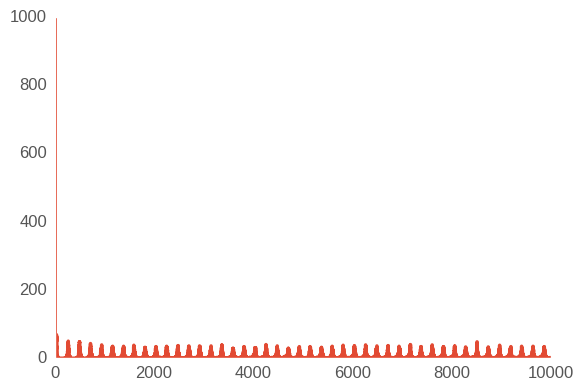

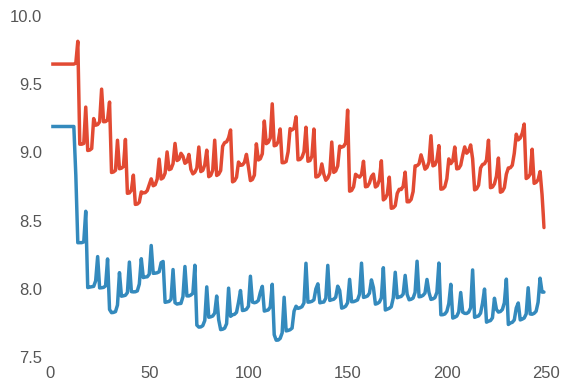

In [7]:
plt.plot(gpu.vvmN2)
plt.figure()
plt.plot(gpu.gammaN1)
plt.plot(gpu.gammaN2)

In [ ]:
r = np.load(filename)
plt.figure(figsize=(15,4))
plt.imshow(r[500:1500, 0:], aspect=0.3)

In [ ]:
# for k in np.arange(0,200,10):
#     a = np.load('../data/GetGammaSteadyState/GetSteadyState4-tauv-15_g-7_N-1000_T-40000_k-%d'%k)
#     plt.plot(k,a['gamma'][-1]*2, '.')

In [5]:
df = pd.DataFrame(columns=('nu','tauv','ratio','g','N','gamma', 'gSteady') )

i=0
N=1000
T = 5000
rList = [0.2,0.5,1,2,3]
nuList = range(0,200,10)
for nu in nuList:
    for tauv in [15, 30, 45, 60, 90]:
            for ratio in rList:
                for g in [10]:
                    i+=1
                    filename = "../data/GetGammaSteadyState/GetSteadyState10-tauv-%d_g-%d_N-%d_T-%d_nu-%d_ratio-%.2f" % (tauv, g, N, T, nu, ratio)
                    a = np.load(filename)
                    df.loc[i] = [nu, tauv, ratio, g, N, a['gamma'][-1], np.mean(a['gamma'][-100:])]

In [12]:
df.to_csv('gSteady.csv')

In [295]:
getGSteady(15,100,1000)

4.7768205953429064

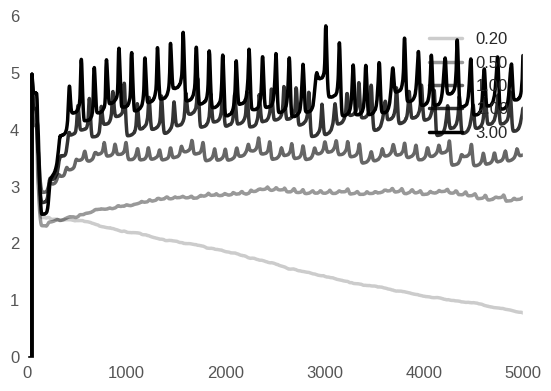

In [6]:
tauv = 15
T = 5000
nu = 190

for i, ratio in enumerate(rList):
    filename = "../data/GetGammaSteadyState/GetSteadyState10-tauv-%d_g-%d_N-%d_T-%d_nu-%d_ratio-%.2f" % (tauv, g, N, T, nu, ratio)
    a = np.load(filename)
    plt.plot(a['gamma'], c='black', alpha=(i+1)/len(rList), label='%.2f'%ratio)
plt.legend()

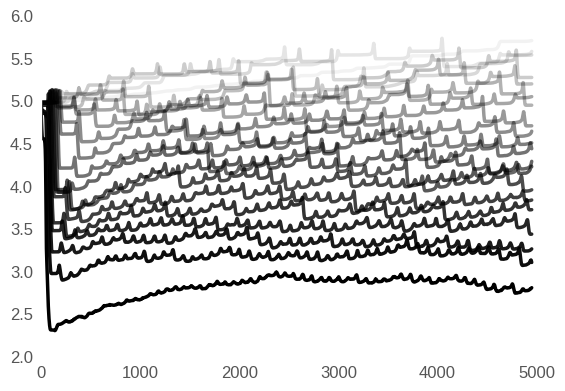

In [9]:
tauv = 15
T = 5000
ratio = 0.5
N= 1000
for i, nu in enumerate(nuList):
    filename = "../data/GetGammaSteadyState/GetSteadyState10-tauv-%d_g-%d_N-%d_T-%d_nu-%d_ratio-%.2f" % (tauv, g, N, T, nu, ratio)
    a = np.load(filename)
    plt.plot(a['gamma'][50:], c='black', alpha=(i+1)/len(nuList))

In [17]:
df[(df['tauv']==15) & (df['nu']==100) & (df['N']==1000) & (df['ratio']==0.5) & (df['g']==10)]

,nu,tauv,ratio,g,N,gamma,gSteady
252,100.0,15.0,0.5,10.0,1000.0,4.457416,4.44167


In [19]:

def getGSteady(tauv, k, N=100):
    '''
    Get steady state value of the gap junction strenght
    '''
    df = pd.read_csv('gSteady.csv')
    df2 = df[(df['tauv']==tauv) & (df['nu']==k) & (df['N']==N) & (df['ratio']==0.5) & (df['g']==10)]
    return df2['gSteady'].values[0]

getGSteady(15,190,1000)

2.802383764500437

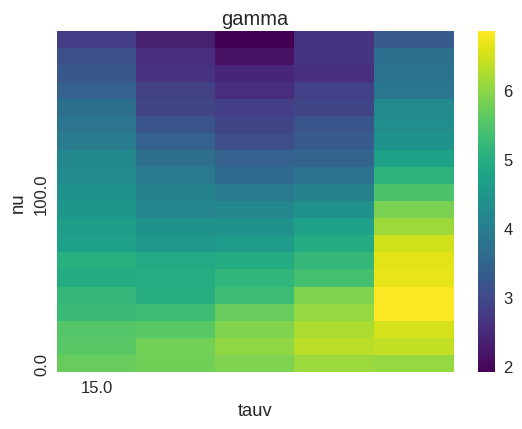

In [11]:
plotHeatmap(df[df['ratio']==0.5], col='gamma', x='tauv',y='nu', cmap='viridis')
plt.savefig(PAPER  +'gamma-steady-heatmap.pdf')
# plotHeatmap(df[df['tauv']==15], col='gamma', x='ratio',y='nu')

## POWER SWITCH

In [8]:
df = pd.DataFrame(columns=('tauv', 'sG', 'both', 'T', 'N', 'nu',
                           'cor', 'f', 'p', 'max', 'argmax', 'begin', 'net'
                          )  )

i=0
N = 2000
dt = 0.1
T = 20000
s0 = 0
d2 = int(1000//dt)-s0
end = T
both = True
nuList = [0,50,100,150]

ratio = 0.5
for nu in nuList:
#         for tauv in np.arange(15,90, 5):
    for tauv in [15,30,45,60,90]:
#                 for sG in np.arange(0,30,2):
                for sG in  [0,10,50,100,200]:
                    for begin in [True, False]:
                        for net in  ['N1', 'N2']:
                            i+=1
                            extension = extension = "-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f_dt-%.1f" % (tauv, sG, N, T, nu,  ratio, dt)
                            filename = "../data/rasters/rastervarPlast2" + extension
                            if i==1: 
                                print(filename)
                            a = np.load(filename)
                            i1 = a['i1N1']
                            i2 = a['i1N2']
                            v1 = a['vvmN1']
                            v2 = a['vvmN2']
                            
                            if begin:
                                cor = np.corrcoef(i1[s0:s0+d2], i2[s0:s0+d2])[0,1]
                                fcsd, Pxy = signal.csd(v1[s0:s0+d2], v2[s0:s0+d2], fs=1 / 0.0001, nperseg=1024)
                                if net=='N1':
                                    f = fourier(v1[s0:s0+d2])[0]
                                    p = fourier(v1[s0:s0+d2])[1]
                                else:
                                    f = fourier(v2[s0:s0+d2])[0]
                                    p = fourier(v2[s0:s0+d2])[1]
                            else:
                                cor = np.corrcoef(i1[T-d2:T], i2[T-d2:T])[0,1]
                                fcsd, Pxy = signal.csd(v1[T-d2:T], v2[T-d2:T], fs=1 / 0.0001, nperseg=512)
                                if net=='N1':
                                    f = fourier(v1[T-d2:T])[0]
                                    p = fourier(v1[T-d2:T])[1]
                                else:
                                    f = fourier(v2[T-d2:T])[0]
                                    p = fourier(v2[T-d2:T])[1]
                            
                            maxi = np.max(np.abs(Pxy))
                            argmax = np.argmax(np.abs(Pxy))





        #                     df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), float(a['cor1']), float(a['cor2']) ]
                            df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), int(nu),
                                         cor, f, p, maxi, argmax, not begin, net!='N1']

../data/rasters/rastervarPlast2-tauv-15_g-0_N-2000_T-20000_k-0_r-0.50_dt-0.1


In [9]:
# df = pd.DataFrame(columns=('tauv', 'sG', 'both', 'T', 'N', 'nu',
#                            'corS_apple', 'corE_apple', 'corChange_apple', 
#                            'f1Begin', 'p1Begin', 'f2Begin', 'p2Begin',
#                             'f1End', 'p1End', 'f2End', 'p2End', 
#                             'maxBegin', 'argmaxBegin', 'maxEnd', 'argmaxEnd'
#                           )  )

# i=0
# N = 2000
# dt = 0.1
# T = 20000
# s0 = 0
# d2 = int(1000//dt)-s0
# end = T
# both = True
# nuList = [0,50,100,150]

# ratio = 0.5
# for nu in nuList:
# #         for tauv in np.arange(15,90, 5):
#     for tauv in [15,30,45,60,90]:
# #                 for sG in np.arange(0,30,2):
#                 for sG in  [0,10,50,100,200]:
#                     i+=1
#                     extension = extension = "-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f_dt-%.1f" % (tauv, sG, N, T, nu,  ratio, dt)
#                     filename = "../data/rasters/rastervarPlast2" + extension
#                     if i==1: 
#                         print(filename)
#                     a = np.load(filename)
#                     i1 = a['i1N1']
#                     i2 = a['i1N2']
#                     v1 = a['vvmN1']
#                     v2 = a['vvmN2']

#                     cor1 = np.corrcoef(i1[s0:s0+d2], i2[s0:s0+d2])[0,1]
#                     cor2 = np.corrcoef(i1[T-d2:T], i2[T-d2:T])[0,1]

#                     corChange = cor2/cor1


#                     f, Pxy = signal.csd(v1[s0:s0+d2], v2[s0:s0+d2], fs=1 / 0.0001, nperseg=1024)
#                     f2, Pxy2 = signal.csd(v1[T-d2:T], v2[T-d2:T], fs=1 / 0.0001, nperseg=1024)

#                     maxBegin = np.max(np.abs(Pxy))
#                     argmaxBegin = np.argmax(np.abs(Pxy))
#                     maxEnd = np.max(np.abs(Pxy2))
#                     argmaxEnd = np.argmax(np.abs(Pxy2))

#                     f1Begin = fourier(v1[s0:s0+d2])[0]
#                     p1Begin = fourier(v1[s0:s0+d2])[1]

#                     f2Begin = fourier(v2[s0:s0+d2])[0]
#                     p2Begin = fourier(v2[s0:s0+d2])[1]

#                     f1End = fourier(v1[T-d2:T])[0]
#                     p1End = fourier(v1[T-d2:T])[1]

#                     f2End = fourier(v2[T-d2:T])[0]
#                     p2End = fourier(v2[T-d2:T])[1]


# #                     df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), float(a['cor1']), float(a['cor2']) ]
#                     df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), int(nu),
#                                  cor1, cor2, 
#                                  corChange,
#                                 f1Begin, p1Begin, f2Begin, p2Begin,
#                                 f1End, p1End, f2End, p2End,
#                                 maxBegin, argmaxBegin, maxEnd, argmaxEnd]

In [4]:
def plotHeatmap(df, col="cor1", title='', cmap=None, y='tauv', x='sG',xres = 10, yres=10, **kws):
    plt.figure()
    '''
    plot heatmap using seaborn library
    '''
    burst = df[[y, x, col]]
    burst.loc[:, (col)] = burst[col].astype(float)
    burst.loc[:,(y)] = burst[y].astype(float)
    burst.loc[:,(x)] = burst[x].astype(float)
    c = burst.pivot(y, x, col)


    im = sns.heatmap(c, yticklabels=yres, xticklabels=xres, cmap=cmap, **kws)
    im.invert_yaxis()
#     sns.set_style("whitegrid")
    if not title:
        title=col
    plt.title(title)
    return im

In [5]:
# vmin = 20
# vmax = 60
# plotHeatmap(df[df['nu']==100], col='f1Begin', x='sG',y='tauv', cmap='viridis', 
#            vmin=vmin, vmax=vmax, annot=True, fmt = '.0f')
# plt.savefig(PAPER + 'f1begin.png')
# plotHeatmap(df[df['nu']==100], col='f2Begin', x='sG',y='tauv', cmap='viridis', 
#            vmin=vmin, vmax=vmax, annot=np.arange(25).reshape((5,5)))
# plotHeatmap(df[df['nu']==100], col='f1End', x='sG',y='tauv', cmap='viridis',
#            vmin=vmin, vmax=vmax, annot=True)
# plotHeatmap(df[df['nu']==100], col='f2End', x='sG',y='tauv', cmap='viridis',
#            vmin=vmin, vmax=vmax, annot=True)

In [42]:
def plotGrid(df, col, title='', cols=['cor1', 'cor2', 'corChange'], **kws):
    data = pd.melt(df, id_vars=['tauv', 'sG', 'begin', 'net'], value_vars=cols)

    with sns.plotting_context(font_scale=5.5):
        g = sns.FacetGrid(data, col="begin", row="net" )
    g = g.map_dataframe(facet_heatmap2, col=col, cols=cols,cbar_ax=None, **kws)
    for ax in g.axes.flat:
        ax.set_title("")
        ax.set_yticklabels([90,60,45,30,15])
        ax.set_xticklabels([0,10,50,100,200])

    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title, fontsize='16')
    g.savefig(PAPER + 'power-plot_%s.png' % col)

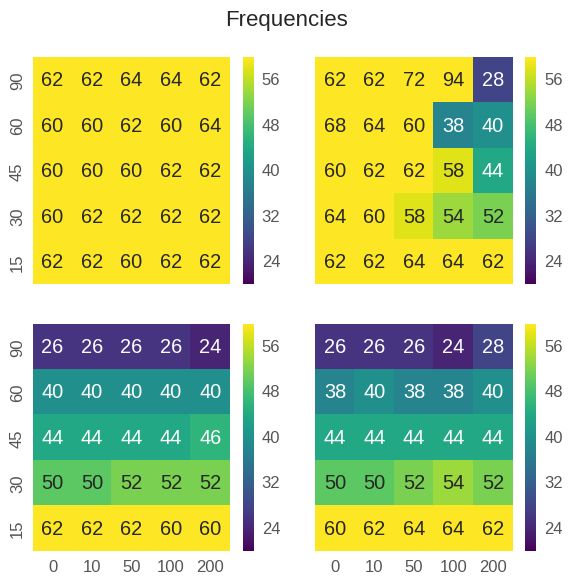

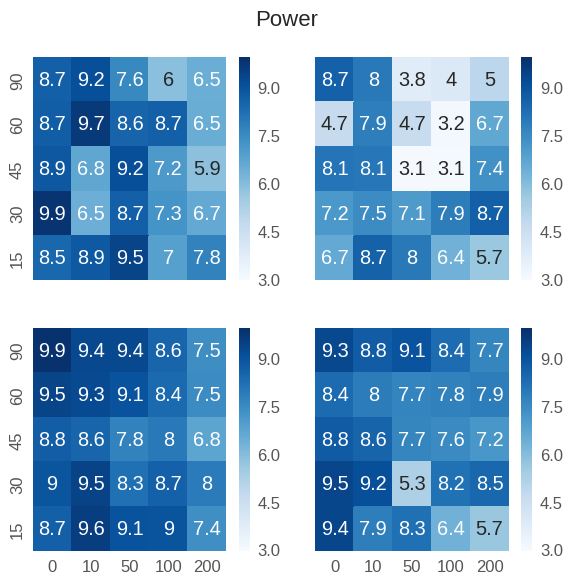

In [45]:
cols = ['f', 'p']
# fig, ax = plt.subplots(figsize=(5,5))  
plotGrid(df[df['nu']==100], 'f', 'Frequencies',cmap="viridis", 
         cols = cols, vmin=20, vmax=60)
plt.savefig(PAPER + 'fig4-freq.svg')
# fig, ax = plt.subplots(figsize=(5,5))  
plotGrid(df[df['nu']==100], 'p', 'Power',cmap="Blues", 
         cols = cols, vmin=3, vmax=10)
plt.savefig(PAPER + 'fig4-power.svg')

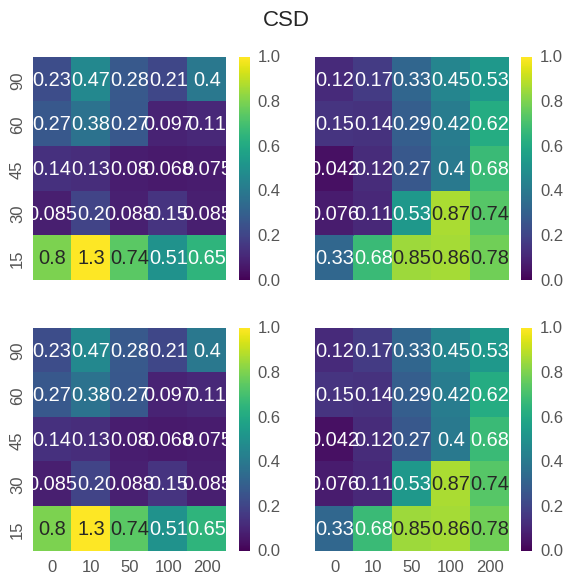

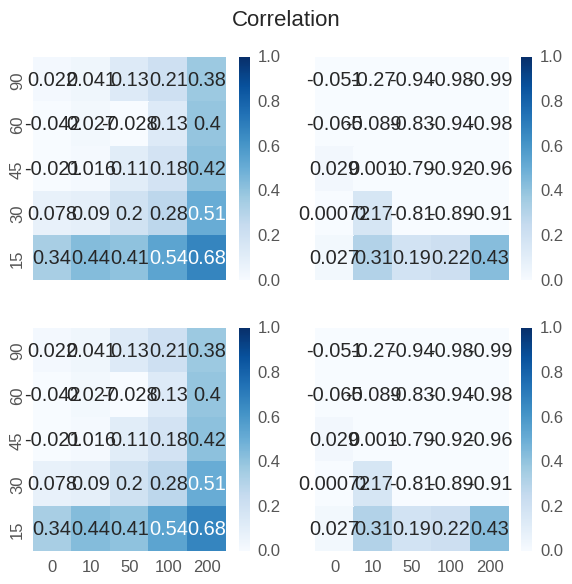

In [46]:
cols = ['max', 'cor']
# fig, ax = plt.subplots(figsize=(5,5))  
plotGrid(df[df['nu']==100], 'max', 'CSD',cmap="viridis", 
         cols = cols, vmin=0, vmax=1)
plt.savefig(PAPER + 'fig4-csd.svg')
# fig, ax = plt.subplots(figsize=(5,5))  
plotGrid(df[df['nu']==100], 'cor', 'Correlation',cmap="Blues", 
         cols = cols, vmin=0, vmax=1)
plt.savefig(PAPER + 'fig4-cor.svg')